## Exploratory Data Analysis

Summary Statistics

Null Analysis

Order Analysis

Time-Series Analysis

Customer Analysis

In [2]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Create dfs for each csv

customers = pd.read_csv('./data/customers_churn.csv')

order_items = pd.read_csv('./data/olist_order_items_dataset.csv')

payments = pd.read_csv('./data/olist_order_payments_dataset.csv')

orders = pd.read_csv('./data/olist_orders_dataset.csv')

products = pd.read_csv('./data/products_translated.csv')

sellers = pd.read_csv('./data/olist_sellers_dataset.csv')

In [4]:
# DataFrames loop

dfs = {
    'customers': customers,
    'order_items': order_items,
    'payments': payments,
    'orders': orders,
    'products': products,
    'sellers': sellers,
}

### Summary Statistics

In [5]:
# Describe method for each df

for key, df in dfs.items():
    print(f"Summary Statistics for {key}:")
    print(df.describe(include = 'all'))
    print("\n\n")

Summary Statistics for customers:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_pre

### Null Analysis

In [6]:
for key, df in dfs.items():
    print(f"Null Value Counts for {key}:")
    print(df.isnull().sum())
    print("\n\n")

Null Value Counts for customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
churn_flag                  0
dtype: int64



Null Value Counts for order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64



Null Value Counts for payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64



Null Value Counts for orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



Null Value Counts

### Order Analysis

**How many orders does each customer have on average?**

In [46]:
# Group by customer and count the number of orders for each customer
customer_order_counts = orders['customer_id'].value_counts()

In [47]:
# Average number of orders per customer
average_orders_per_customer = customer_order_counts.mean()
print(f'Average number of orders per customer: {average_orders_per_customer}')

Average number of orders per customer: 1.0


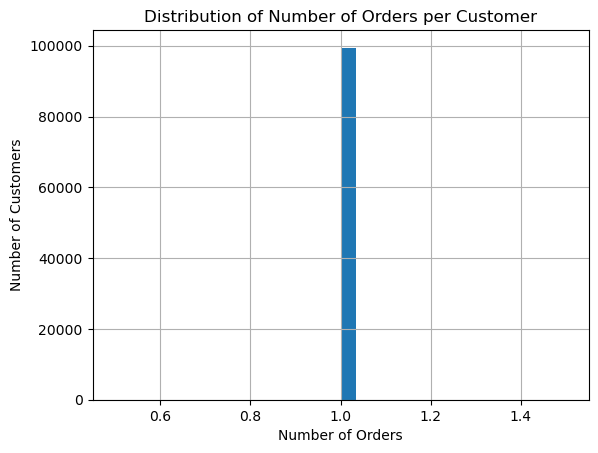

In [48]:
# Distribution of orders
customer_order_counts.hist(bins=30)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

**What is the average order value?**

In [49]:
# Merge the orders and order_items dataframes
orders_with_items = pd.merge(orders, order_items, on='order_id')

In [50]:
# Total price of each order
orders_with_items['total_order_value'] = orders_with_items.groupby('order_id')['price'].transform('sum')

In [51]:
# Average order value
average_order_value = orders_with_items['total_order_value'].mean()
average_order_rounded = round(average_order_value,2)
print(f'Average order value: ${average_order_rounded}')

Average order value: $152.97


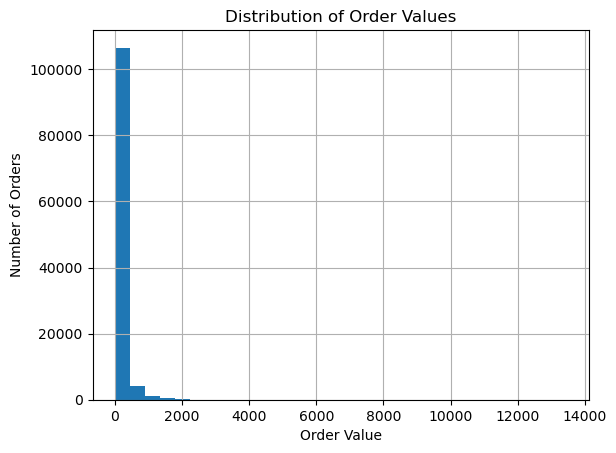

In [52]:
# Distribution of order values
orders_with_items['total_order_value'].hist(bins=30) 
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Number of Orders')
plt.show()

**What are the most popular product categories?**

In [53]:
# Merge order_items dataframe with products dataframe
merged_df = pd.merge(order_items, products, on='product_id')

In [54]:
# Order count for each product category
product_category_order_counts = merged_df['product_category_name_english'].value_counts()

In [55]:
# Top 10 product categories
top_10_product_categories = product_category_order_counts.head(10).reset_index()

In [56]:
# Rename columns
top_10_product_categories.columns = ['product_category_name', 'order_count']

print('Top 10 most popular product categories with order counts:')
print("")
print(top_10_product_categories)


Top 10 most popular product categories with order counts:

   product_category_name  order_count
0         bed_bath_table        11115
1          health_beauty         9670
2         sports_leisure         8641
3        furniture_decor         8334
4  computers_accessories         7827
5             housewares         6964
6          watches_gifts         5991
7              telephony         4545
8           garden_tools         4347
9                   auto         4235


### Time-Series Analysis

**What are the number of orders over time?**

In [58]:
# Convert order_purchase_timestamp to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [59]:
# Create order date column to store just date
orders['order_date'] = orders['order_purchase_timestamp'].dt.date

In [60]:
# Count number of orders each day
orders_per_day = orders['order_date'].value_counts().sort_index()

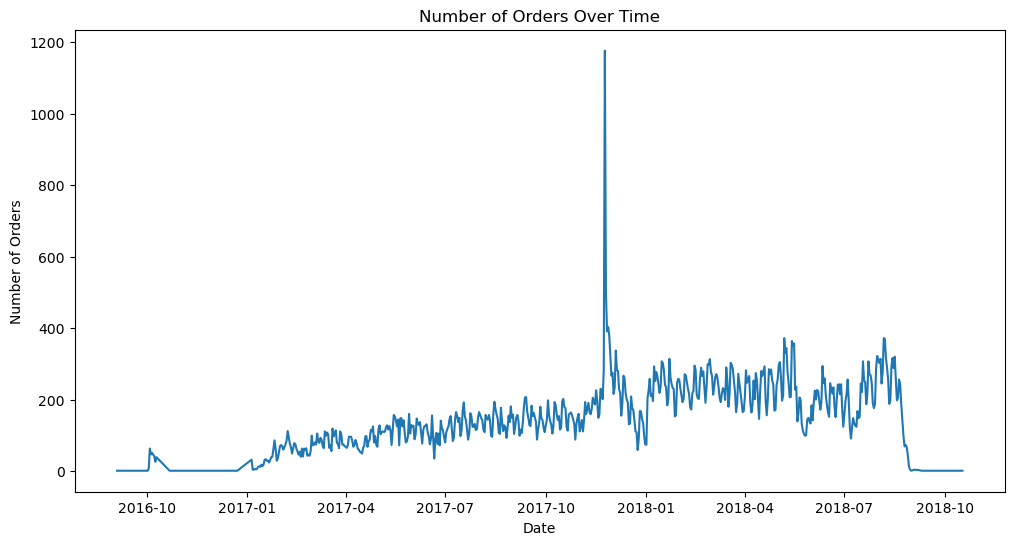

In [61]:
# Plot orders over time
plt.figure(figsize=(12,6))
plt.plot(orders_per_day)
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

**What are the average order value over time?**

In [62]:
# Merge orders and order items dfs
merged_df = pd.merge(orders, order_items, on='order_id')

In [63]:
# Total price per day
total_price_per_day = merged_df.groupby('order_date')['price'].sum()

In [64]:
# Total orders per day
total_orders_per_day = merged_df.groupby('order_date')['order_id'].nunique()

In [65]:
# Average value per day
avg_order_value_per_day = total_price_per_day / total_orders_per_day

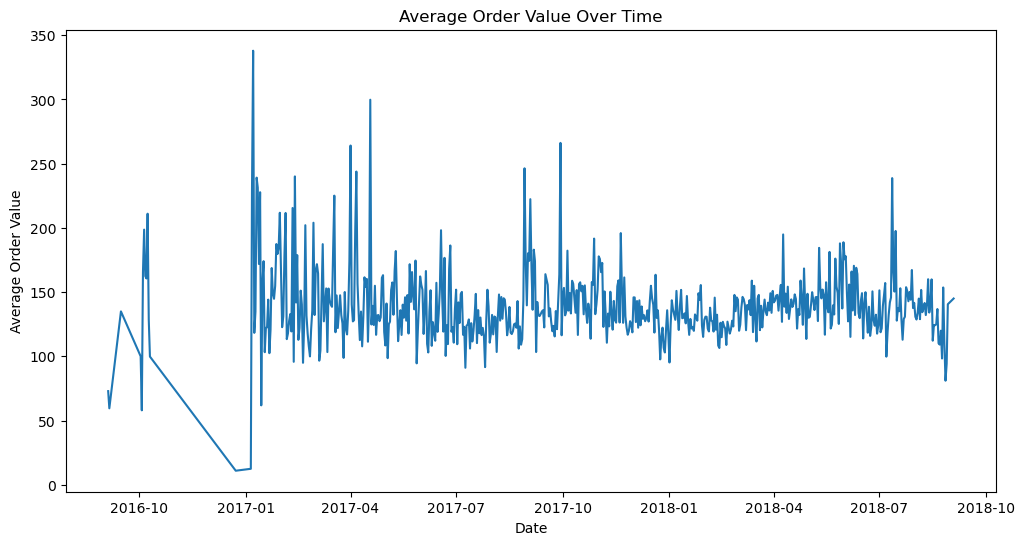

In [66]:
# Plot average value over time
plt.figure(figsize=(12,6))
plt.plot(avg_order_value_per_day)
plt.title('Average Order Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Order Value')
plt.show()

In [ ]:
#### ADD TIME-SERIES DECOMPOSITION

### Customer Analysis

**What is the summary of the churned vs. retained customers?**

Churn was defined by customers who have not made a purchase in last six months

Dataset End Date: 9/20/2018
Churn Cutoff Date: 3/20/2018

In [73]:
# Merge order and customers tables
customer_orders = pd.merge(orders, customers, on='customer_id')

# Merge customer_orders and order items dfs
customer_order_items = pd.merge(customer_orders, order_items, on='order_id')

In [74]:
# Number of orders, average order value for churned customers
customer_summary = customer_order_items.groupby(['customer_id', 'churn_flag']).agg({'order_id': 'count', 'price': 'mean'}).reset_index()
customer_summary.columns = ['customer_id', 'churn_flag', 'num_orders', 'avg_order_value']

In [75]:
# Average number of orders and order values
customer_summary.groupby('churn_flag').agg({'num_orders': 'mean', 'avg_order_value': 'mean'})

,num_orders,avg_order_value
churn_flag,,
0,1.143112,128.435423
1,1.140962,124.523128


**Which product categories are popular with churned customers?**

In [76]:
# Merge products and customer_order_items dfs
prod_cust_order_items = pd.merge(products, customer_order_items, on='product_id')

In [77]:
# Group by product category and churn_flag
product_category_summary = prod_cust_order_items.groupby(['product_category_name_english', 'churn_flag']).agg({'order_id': 'count'}).reset_index()
product_category_summary.columns = ['product_category_name', 'churn_flag', 'num_orders']

In [80]:
# Sort by most popular product categories
churned_product_categories = product_category_summary[product_category_summary['churn_flag'] == 1].sort_values('num_orders', ascending=False)
print(churned_product_categories)

                     product_category_name  churn_flag  num_orders
15                          bed_bath_table           1        7240
130                         sports_leisure           1        5913
79                         furniture_decor           1        5640
87                           health_beauty           1        5457
31                   computers_accessories           1        5285
..                                     ...         ...         ...
128  small_appliances_home_oven_and_coffee           1          13
105                             la_cuisine           1          11
59               fashion_childrens_clothes           1           6
122                  security_and_services           1           2
7                    arts_and_craftmanship           1           2

[71 rows x 3 columns]


In [81]:
retained_product_categories = product_category_summary[product_category_summary['churn_flag'] == 0].sort_values('num_orders', ascending=False)
print(retained_product_categories)

                 product_category_name  churn_flag  num_orders
86                       health_beauty           0        4213
14                      bed_bath_table           0        3875
98                          housewares           0        3029
129                     sports_leisure           0        2728
139                      watches_gifts           0        2704
..                                 ...         ...         ...
133             tablets_printing_image           0           3
58           fashion_childrens_clothes           0           2
64                       fashion_sport           0           2
82   furniture_mattress_and_upholstery           0           2
22                   cds_dvds_musicals           0           1

[70 rows x 3 columns]
